In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import plotly
plotly.tools.set_credentials_file(username='xueqianh', api_key='yjR7JZDPCDmke7DqcwRm')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from scipy import signal
import plotly.tools as tls
import matplotlib.mlab as mlab
import scipy
import plotly.figure_factory as ff


# Import original dataset

In [2]:
#import data
all_dt = pd.read_csv('OnlineNewsPopularity.csv')

num_of_ins = all_dt.shape[0]
num_of_att = all_dt.shape[1]

print('There are totally', num_of_att, 'attibutes.')
print('There are totally', num_of_ins, 'instances.')

There are totally 61 attibutes.
There are totally 39644 instances.


In [4]:
pd.set_option('display.max_columns', None)
all_dt.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
# Strip out the unwanted white space from the column headings

all_dt.columns = all_dt.columns.str.strip()


In [4]:
# Get summary statistics of shares

print('Summary statistics of the target value [shares]: ')

print(all_dt['shares'].describe([.33, .66]))

print('mode: ', all_dt['shares'].mode())

print('median: ', all_dt['shares'].median())

Summary statistics of the target value [shares]: 
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
33%        1100.000000
50%        1400.000000
66%        2100.000000
max      843300.000000
Name: shares, dtype: float64
mode:  0    1100
dtype: int64
median:  1400.0


### Density plot of the target value ['shares']

In [6]:

fig = plt.figure(figsize = (14,8))


mu = 3395 # mean of distribution
sigma = 11627 # standard deviation of distribution
x = all_dt['shares']

num_bins = 39644
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('shares')
plt.ylabel('Density')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

plotly_fig = tls.mpl_to_plotly( fig )
py.iplot(plotly_fig, filename='histogram-mpl-legend')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



The draw time for this plot will be slow for all clients.


/anaconda3/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [6]:
low = all_dt[all_dt.shares < 3500]
print(low['shares'].describe([.33, .66]))

count    31836.000000
mean      1399.646815
std        712.899120
min          1.000000
33%        970.000000
50%       1200.000000
66%       1500.000000
max       3400.000000
Name: shares, dtype: float64


In [11]:

x1 = low['shares']  

hist_data = [x1]
group_labels = ['shares']

colors = ['#3A4750']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5, curve_type='normal')

# Add title
fig['layout'].update(title='Distplot with Normal Distribution')

# Plot!
py.iplot(fig, filename='Distplot with Normal Curve')

#### Convert target values to class   'Low Popularity' ( less than 1100 shares),  'Intermediate Popularity' ( more than 1100 and less than 3500) and  'High Popularity'( more than 3500 shares).

In [6]:
for value in all_dt['shares']:
    if value <= 1100:
        all_dt['shares'] = all_dt['shares'].replace(value, 'Low Popularity')
    elif 1100 < value < 3500:
        all_dt['shares'] = all_dt['shares'].replace(value, 'Intermediate Popularity')
    else:
        all_dt['shares'] = all_dt['shares'].replace(value, 'High Popularity')

print(all_dt['shares'].value_counts())

Intermediate Popularity    17104
Low Popularity             14732
High Popularity             7808
Name: shares, dtype: int64


## Normalize the dataset

In [9]:
all_dt = all_dt.drop(columns="url")

att_names = []
for att in all_dt:
    att_names.append(att)

scaler = MinMaxScaler(feature_range=[0, 1])

X = all_dt.loc[:, all_dt.columns != 'shares']
Y = all_dt.loc[:, 'shares']

norm_X = scaler.fit_transform(X)
train_X = pd.DataFrame(norm_X, columns=att_names[:(all_dt.shape[1]-1)])

norm_dataset = pd.concat([train_X, Y], axis=1)


In [10]:
norm_dataset.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,...,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,Low Popularity
1,1.0,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,...,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,Low Popularity
2,1.0,0.333333,0.024900,0.000820,0.00096,0.001021,0.009868,0.008621,0.007812,0.0,...,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,Intermediate Popularity
3,1.0,0.333333,0.062662,0.000719,0.00096,0.001024,0.029605,0.000000,0.007812,0.0,...,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,Intermediate Popularity
4,1.0,0.523810,0.126505,0.000593,0.00096,0.000832,0.062500,0.163793,0.156250,0.0,...,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,Low Popularity


### Split dataset into training dataset and test dataset

In [11]:
# Split dataset into training dataset and test dataset

from sklearn.model_selection import train_test_split

# create training and testing vars

train_set, test_set = train_test_split(norm_dataset, test_size = 0.2)

print('Tranning dataset: ', train_set.shape)
print('Test dataset: ', test_set.shape)

train_set.to_csv('train_set.csv', sep=',', encoding='utf-8', index = False)
test_set.to_csv('test_set.csv', sep=',', encoding='utf-8', index = False)


Tranning dataset:  (31715, 60)
Test dataset:  (7929, 60)


# Import trainning dataset

In [12]:
# Import trainning dataset

train_df = pd.read_csv('train_set.csv')

num_ins = train_df.shape[0]
num_att = train_df.shape[1]

print('There are totally', num_att, 'attibutes.')
print('There are totally', num_ins, 'instances.')

print(train_df['shares'].value_counts())



There are totally 60 attibutes.
There are totally 31715 instances.
Intermediate Popularity    13714
Low Popularity             11750
High Popularity             6251
Name: shares, dtype: int64


### Handeling imbalanced dataset

In [13]:
# Handeling imbalanced dataset

n_majority = len(train_df[train_df.shares=='Intermediate Popularity'])

from sklearn.utils import resample

df_majority = train_df[train_df.shares=='Intermediate Popularity']
df_minority1 = train_df[train_df.shares=='Low Popularity']
df_minority2 = train_df[train_df.shares=='High Popularity']


 
# Upsample minority class1
df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=n_majority) # reproducible results
# Upsample minority class2
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=n_majority) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled1, df_minority_upsampled2])
 
# Display new class counts
print(df_upsampled.shares.value_counts())

# Show resampled traning dataset

n_ins = df_upsampled.shape[0]
n_att = df_upsampled.shape[1]

print('\nThere are totally', n_att, 'attibutes after resampling.')
print('\nThere are totally', n_ins, 'instances after resampling.')



Low Popularity             13714
Intermediate Popularity    13714
High Popularity            13714
Name: shares, dtype: int64

There are totally 60 attibutes after resampling.

There are totally 41142 instances after resampling.


### Save balanced dataset to csv

In [14]:
df_upsampled.to_csv('Balanced_train_set.csv', sep=',', encoding='utf-8', index = False)

## Feature selection

In [45]:
dataset = pd.read_csv("Balanced_train_set.csv")

train_data = dataset.loc[:, dataset.columns != 'shares']
train_label = dataset.loc[:, 'shares']


#### Rank features with Tree-based estimators

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# feature extraction
model = ExtraTreesClassifier()
model.fit(train_data, train_label)

newdf2 = pd.DataFrame(
    {
        'att': att_names[:59],
        'feature_score': model.feature_importances_
    }
)

newdf2 = newdf2.sort_values('feature_score', ascending=False)

print(newdf2)

                              att  feature_score
40                         LDA_02       0.027959
26                     kw_avg_avg       0.025985
24                     kw_min_avg       0.025924
41                         LDA_03       0.025749
0                       timedelta       0.024210
25                     kw_max_avg       0.023035
38                         LDA_00       0.022575
23                     kw_avg_max       0.022335
39                         LDA_01       0.022087
5        n_non_stop_unique_tokens       0.021726
11                   num_keywords       0.021725
42                         LDA_04       0.021542
53          min_negative_polarity       0.021372
6                       num_hrefs       0.021291
43            global_subjectivity       0.021261
1                  n_tokens_title       0.021173
3                 n_unique_tokens       0.021008
20                     kw_avg_min       0.020947
2                n_tokens_content       0.020775
29     self_referenc

In [47]:
low_score_attributes = ['n_non_stop_words', 'data_channel_is_lifestyle', 'weekday_is_sunday', \
                        'weekday_is_saturday', 'data_channel_is_tech', 'data_channel_is_bus', \
                        'data_channel_is_socmed', 'weekday_is_friday', 'weekday_is_thursday', \
                       'is_weekend', 'weekday_is_monday', 'weekday_is_wednesday', 'weekday_is_tuesday',\
                       'data_channel_is_world', 'kw_max_max', 'kw_min_min']
new_train_data = train_data.drop(columns=low_score_attributes)


In [48]:
new_train_data.shape

(41142, 43)

In [49]:
data = new_train_data.values
train_data = train_data.values
label = train_label.values

In [50]:
from sklearn.model_selection import cross_val_score
import time

def DecisionTreeModel(data, label):
    T0 = time.time()
    DecisionTree = DecisionTreeClassifier(random_state=0)
    DTscore = cross_val_score(DecisionTree, data, label, cv=10).mean()
    T1 = time.time() - T0
    print("Accuracy for Decision Tree:" + str(round(DTscore*100, 2)) + "%")
    print("Running time:" + str(round(T1, 2)))
    
print('\n**** Before dropping low score features ****')
DecisionTree = DecisionTreeModel(train_data, label)
print('\n**** After dropping low score features ****')
DecisionTree = DecisionTreeModel(data, label)


**** Before dropping low score features ****
Accuracy for Decision Tree:73.35%
Running time:16.45

**** After dropping low score features ****
Accuracy for Decision Tree:72.89%
Running time:15.0


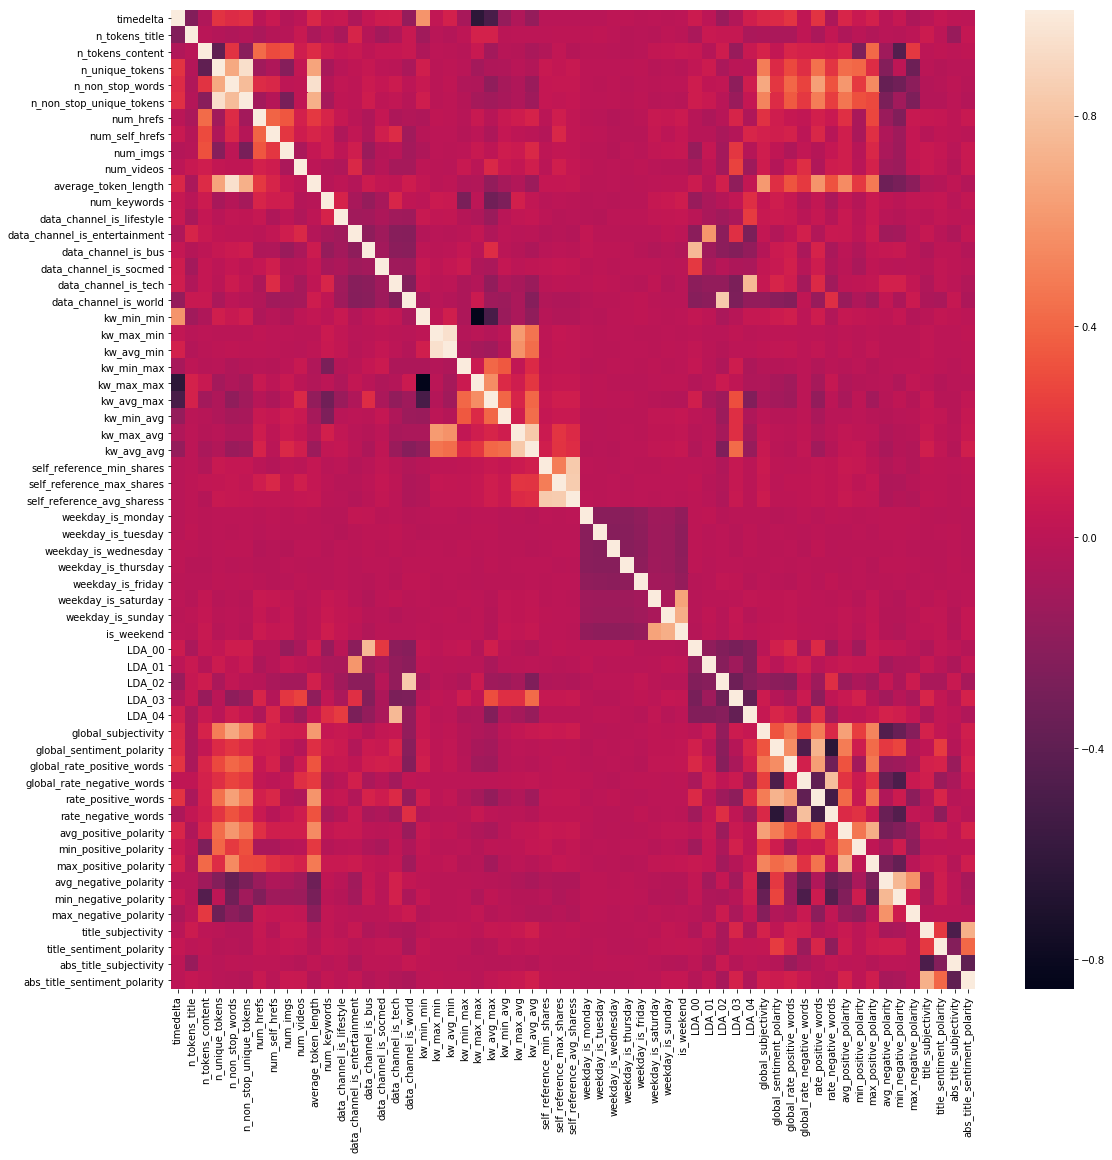

In [21]:
# calculate the correlation matrix
corr = train_data.corr()

# plot the heatmap

fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [22]:
cmap = sns.cubehelix_palette(8, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())